## <center> Indian Cuisine Analysis </center>

**Indian Cuisine** consists of a variety of regional and traditional cuisines native to the Indian Subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, cultural choices and traditions. 

The cuisine of India is one of the world's most diverse cuisines, characterized by its sophisticated and subtle use of the many spices, vegetables, grains and fruits grown across India. The cuisine of each geographical region includes a wide assortment of dishes and cooking techniques reflecting the varied demographics of the ethnically diverse Indian subcontinent. 

This notebook comprises of some interesting facts and observations that people might not know about Indian cuisine.

### Table of Contents

* [Proportion of Vegetarian and Non-Vegetarian dishes](#chapter1)
* [Number of dishes based on regions](#section_1_1)
* [Number of dishes based on courses of meal](#section_1_2_1)
* [Proportion of Flavor Profiles](#section_1_2_2)
* [List of Indian dishes that are sweet in flavor but not desserts](#section_1_2_5)
* [Comparing preparation time and cooking time for Veg and Non Veg dishes](#section_1_2_8)
* [Maharashtra Food - Mini Infograph](#section_1_2_9)
* [Punjab Food - Mini Infograph](#section_1_2_9_1)
* [South Indian Cuisine Food-Mini Infograph](#section_1_2_9_2)
* [Top 10 snacks with shortest cooking time](#section_1_2_12)
* [Top 10 snacks with longest cooking time](#section_1_2_13)
* [Top 10 main courses with shortest cooking time](#section_1_2_14)
* [Top 10 main courses with longest cooking time](#section_1_2_15)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud, ImageColorGenerator
from pywaffle import Waffle 

In [2]:
df = pd.read_csv('data/indian_food.csv')
df=df.replace(-1,np.nan)
df=df.replace('-1',np.nan)
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [3]:
df.shape

(255, 9)

The dataset consists of about **255** Indian dishes and **9** columns associated with each of them.

The **9** columns are as follows:-

**name** : name of the dish

**ingredients** : main ingredients used

**diet** : type of diet - either vegetarian or non vegetarian

**prep_time** : preparation time

**cook_time** : cooking time

**flavor_profile** : flavor profile includes whether the dish is spicy, sweet, bitter, etc

**course** : course of meal - starter, main course, dessert, etc

**state** : state where the dish is famous or is originated

**region** : region where the state belongs


All the observations in this notebook are based on these **255** dishes. There are many more dishes in Indian Cuisine! 

### Proportion of Vegetarian and Non-Vegetarian dishes <a class="anchor" id="chapter1"></a>

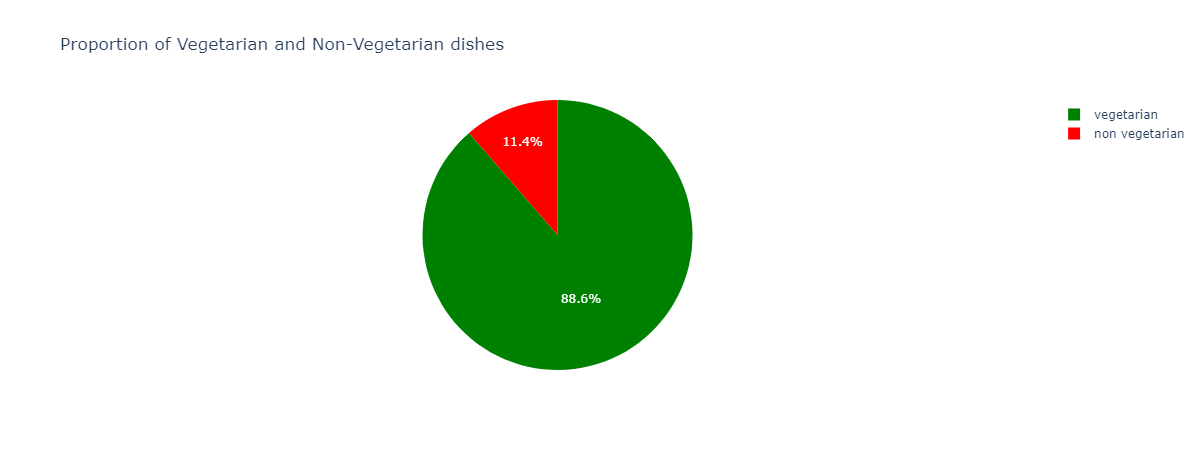

In [4]:
pie_df = df.diet.value_counts().reset_index()
pie_df.columns = ['diet','count']

# plot = pie_df.plot.pie(y='count', autopct="%.1f%%", labels=['Vegeterian', 'Non-Vegeterian'], pctdistance=0.5, figsize=(8, 8))
# plt.title("Proportion of Vegetarian and Non-Vegetarian dishes", fontsize=14);

fig = px.pie(pie_df, values='count', names='diet', title='Proportion of Vegetarian and Non-Vegetarian dishes',
             color_discrete_sequence=['green', 'red'])
fig.show()

#### Observation : 
> Vegetarian dishes are **more** than Non Vegetarian dishes

### Number of dishes based on regions <a class="anchor" id="section_1_1"></a>

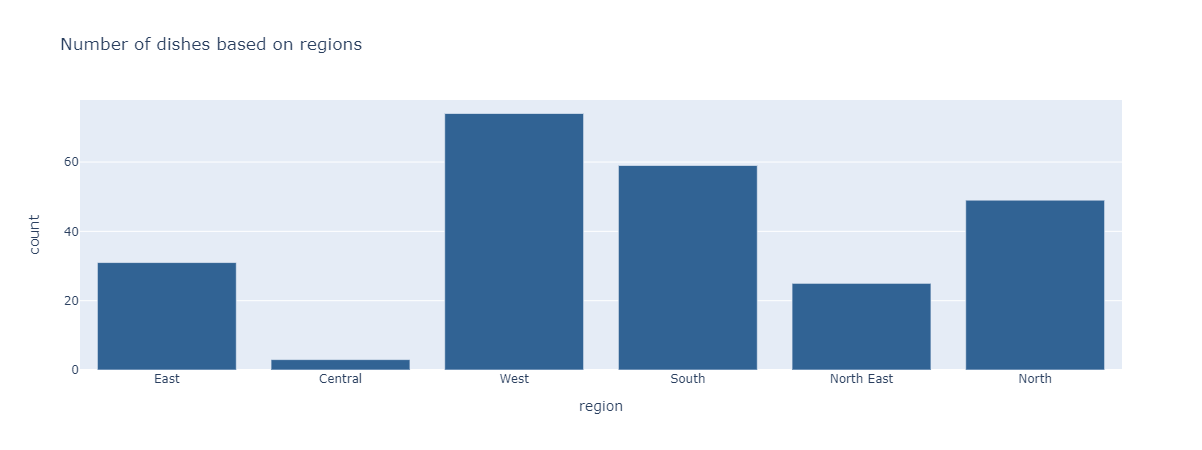

In [5]:
reg_df = df.region.value_counts().reset_index()
reg_df.columns = ['region','count']
reg_df = reg_df.sample(frac=1)

fig = px.bar(reg_df,x='region',y='count',title='Number of dishes based on regions',
             color_discrete_sequence=['#316394'])
fig.show()

#### Observation : 
> The most amount of dishes come from **West**. Followed by **South** and **North**.

> **Central** region have only **3** dishes.

### Number of dishes based on courses of meal <a class="anchor" id="section_1_2_1"></a>

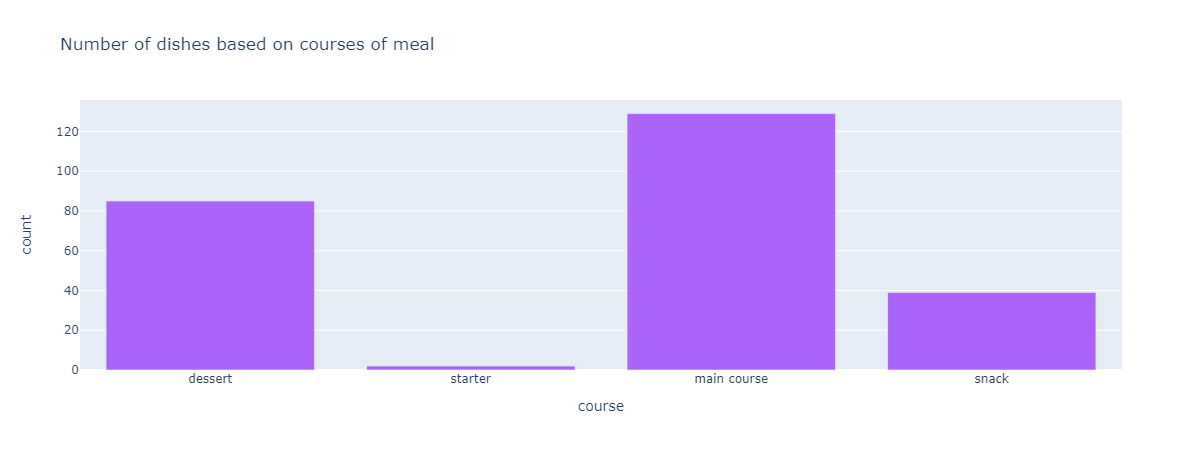

In [6]:
course_df = df.course.value_counts().reset_index()
course_df.columns = ['course','count']
course_df = course_df.sample(frac=1)
fig = px.bar(course_df,x='course',y='count',title='Number of dishes based on courses of meal',
             color_discrete_sequence=['#AB63FA'])
fig.show()

#### Observation : 
> About **129** dishes are preferably eaten as a main course

### Proportion of Flavor Profiles <a class="anchor" id="section_1_2_2"></a>

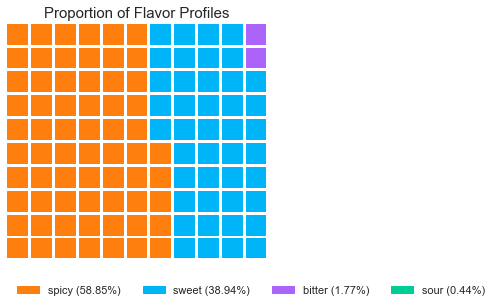

In [7]:
data = dict(df['flavor_profile'].value_counts(normalize = True) * 100)

flavor = ['spicy','sweet','bitter','sour'] 
            

fig = plt.figure( 
                    rows=10,
                    columns=11,
                    FigureClass = Waffle, 
                    values = data, 
                    title={'label': 'Proportion of Flavor Profiles', 'loc': 'center',
                          'fontsize':15},
                    colors=("#FF7F0E", "#00B5F7", "#AB63FA","#00CC96"),
                    labels=[f"{k} ({v:.2f}%)" for k, v in data.items()],
                    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.2), 'ncol': len(data), 'framealpha': 0},
                    figsize=(6, 8)
                )

#### Observation : 
> - More than **58%** of the dishes are **spicy** in flavor
> - Least number of dishes are **sour** in flavor

### List of Indian dishes that are sweet in flavor but not desserts <a class="anchor" id="section_1_2_5"></a>

In [8]:
sweet_df = df[df['flavor_profile']=='sweet']
final_sweet_df = sweet_df[sweet_df['course']!='dessert']
final_sweet_df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180.0,60.0,sweet,main course,Karnataka,South
85,Dal makhani,"Red kidney beans, urad dal, cream, garam masal...",vegetarian,10.0,60.0,sweet,main course,Punjab,North
243,Mishti Chholar Dal,"Chana dal, fresh coconut, ginger, cinnamon, ra...",vegetarian,10.0,30.0,sweet,main course,West Bengal,East


* Obbattu Holige
* Dal Makhani
* Mishti Cholar Dal

### Comparing preparation time and cooking time for Veg and Non Veg dishes <a class="anchor" id="section_1_2_8"></a>

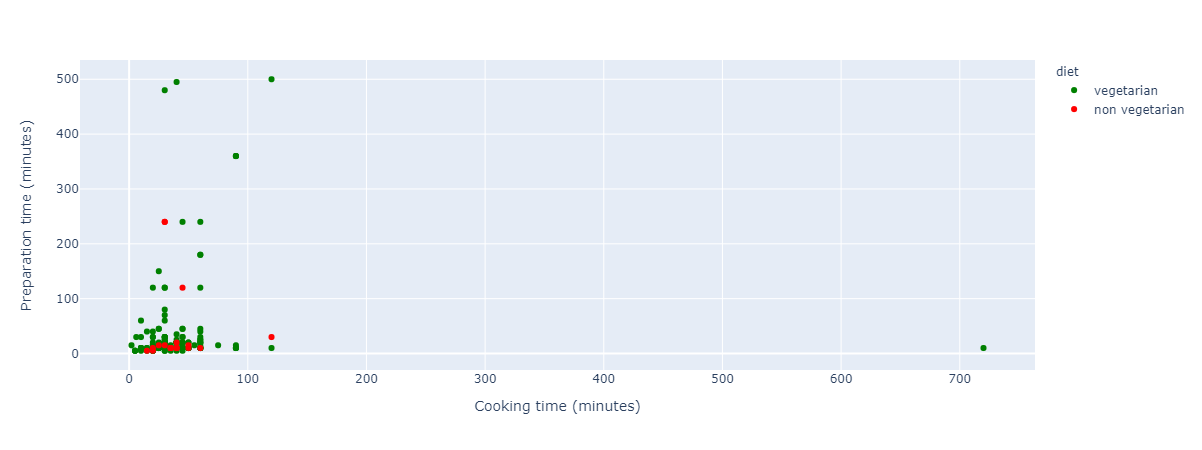

In [9]:
fig = px.scatter(df,x='cook_time',y='prep_time',color='diet',
                 color_discrete_sequence=['green','red'], hover_data = ['name'],
                 labels={
                     'cook_time': 'Cooking time (minutes)',
                     'prep_time': 'Preparation time (minutes)'
                 })
fig.show()

#### Observation : 
> - Most of the dishes vegeterian as well as non-vegeterian have preparation time and cooking time between **0 to 100** minutes.

### Maharashtra Food - Mini Infograph <a class="anchor" id="section_1_2_9"></a>

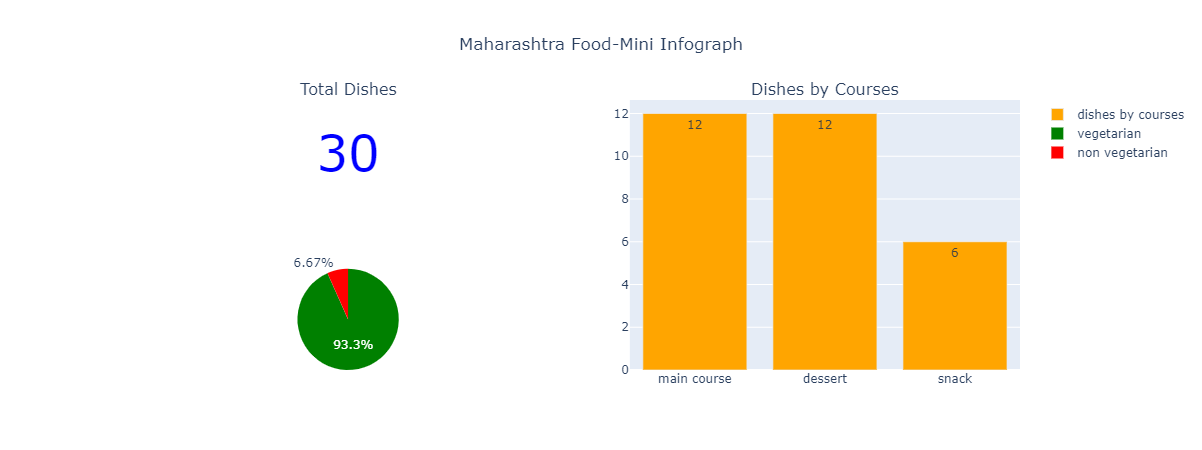

In [10]:
mah_df = df[df['state']=='Maharashtra']

total_dishes = mah_df.shape[0]

course_df = mah_df['course'].value_counts().reset_index()
course_df.columns = ['course','num']

diet_df = mah_df['diet'].value_counts().reset_index()
diet_df.columns = ['diet','num']

fig = make_subplots(
    rows=2, cols=2,subplot_titles=('Total Dishes','Dishes by Courses','', ''),
    specs=[[{'type': 'indicator'},{'type': 'bar','rowspan': 2} ],
          [ {'type': 'pie'} , {'type': 'pie'}]])

fig.add_trace(go.Indicator(
    mode = 'number',
    value = int(total_dishes),
    number={'font':{'color': 'blue','size':50}},
),row=1, col=1)


fig.add_trace(go.Bar(
    x=course_df['course'],y=course_df['num'],
    marker={'color': 'orange'},  
    text=course_df['num'],
    name='dishes by courses',
    textposition ='auto'),row=1, col=2)

fig.add_trace(go.Pie(labels=diet_df['diet'], 
                     values=diet_df['num'],textinfo='percent',
                    marker= dict(colors=['green','red'])),row=2, col=1)


fig.update_layout(
    title_text='Maharashtra Food-Mini Infograph',template='plotly',
    title_x=0.5)

fig.show()

### Punjab Food - Mini Infograph <a class="anchor" id="section_1_2_9_1"></a>

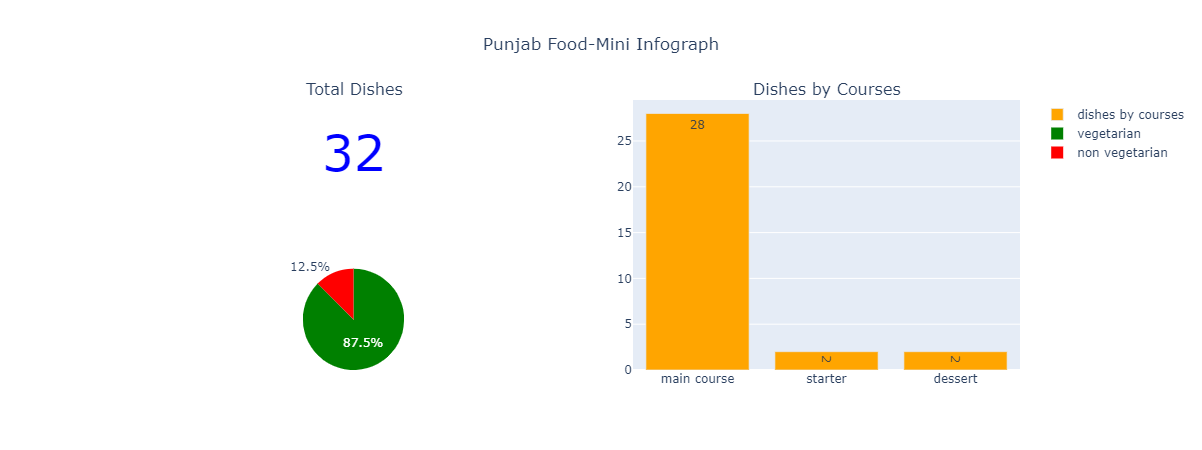

In [11]:
pun_df = df[df['state']=='Punjab']

total_dishes = pun_df.shape[0]

course_df = pun_df['course'].value_counts().reset_index()
course_df.columns = ['course','num']

diet_df = pun_df['diet'].value_counts().reset_index()
diet_df.columns = ['diet','num']

fig = make_subplots(
    rows=2, cols=2,subplot_titles=('Total Dishes','Dishes by Courses','', ''),
    specs=[[{'type': 'indicator'},{'type': 'bar','rowspan': 2} ],
          [ {'type': 'pie'} , {'type': 'pie'}]])

fig.add_trace(go.Indicator(
    mode = 'number',
    value = int(total_dishes),
    number={'font':{'color': 'blue','size':50}},
),row=1, col=1)


fig.add_trace(go.Bar(
    x=course_df['course'],y=course_df['num'],
    marker={'color': 'orange'},  
    text=course_df['num'],
    name='dishes by courses',
    textposition ='auto'),row=1, col=2)

fig.add_trace(go.Pie(labels=diet_df['diet'], 
                     values=diet_df['num'],textinfo='percent',
                    marker= dict(colors=['green','red'])),row=2, col=1)


fig.update_layout(
    title_text='Punjab Food-Mini Infograph',template='plotly',
    title_x=0.5)

fig.show()

### South Indian Cuisine Food-Mini Infograph <a class="anchor" id="section_1_2_9_2"></a>

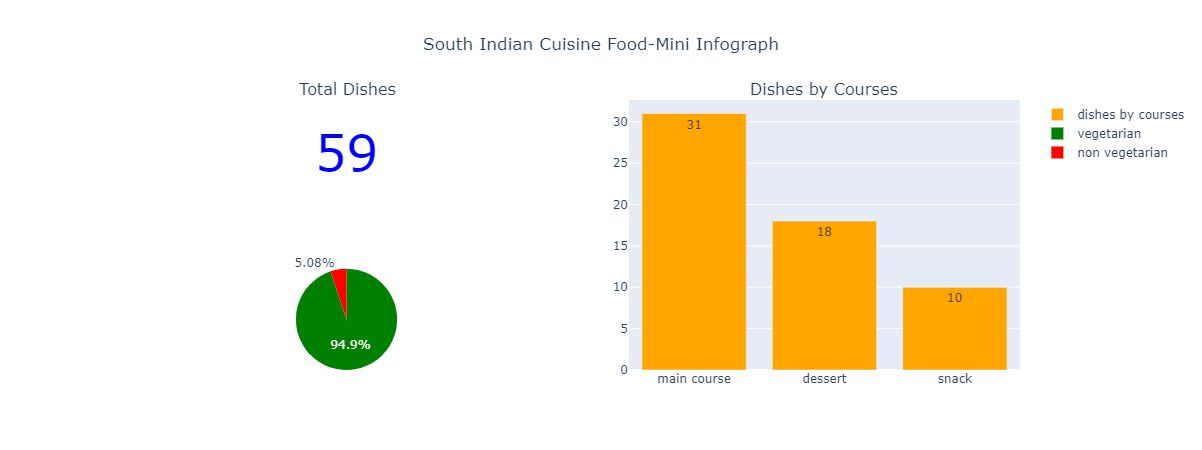

In [12]:
south_df = df[df['region']=='South']

total_dishes = south_df.shape[0]

course_df = south_df['course'].value_counts().reset_index()
course_df.columns = ['course','num']

diet_df = south_df['diet'].value_counts().reset_index()
diet_df.columns = ['diet','num']

fig = make_subplots(
    rows=2, cols=2,subplot_titles=('Total Dishes','Dishes by Courses','', ''),
    specs=[[{'type': 'indicator'},{'type': 'bar','rowspan': 2} ],
          [ {'type': 'pie'} , {'type': 'pie'}]])

fig.add_trace(go.Indicator(
    mode = 'number',
    value = int(total_dishes),
    number={'font':{'color': 'blue','size':50}},
),row=1, col=1)


fig.add_trace(go.Bar(
    x=course_df['course'],y=course_df['num'],
    marker={'color': 'orange'},  
    text=course_df['num'],
    name='dishes by courses',
    textposition ='auto'),row=1, col=2)

fig.add_trace(go.Pie(labels=diet_df['diet'], 
                     values=diet_df['num'],textinfo='percent',
                    marker= dict(colors=['green','red'])),row=2, col=1)


fig.update_layout(
    title_text='South Indian Cuisine Food-Mini Infograph',template='plotly',
    title_x=0.5)

fig.show()

### Top 10 snacks with shortest cooking time <a class="anchor" id="section_1_2_12"></a>

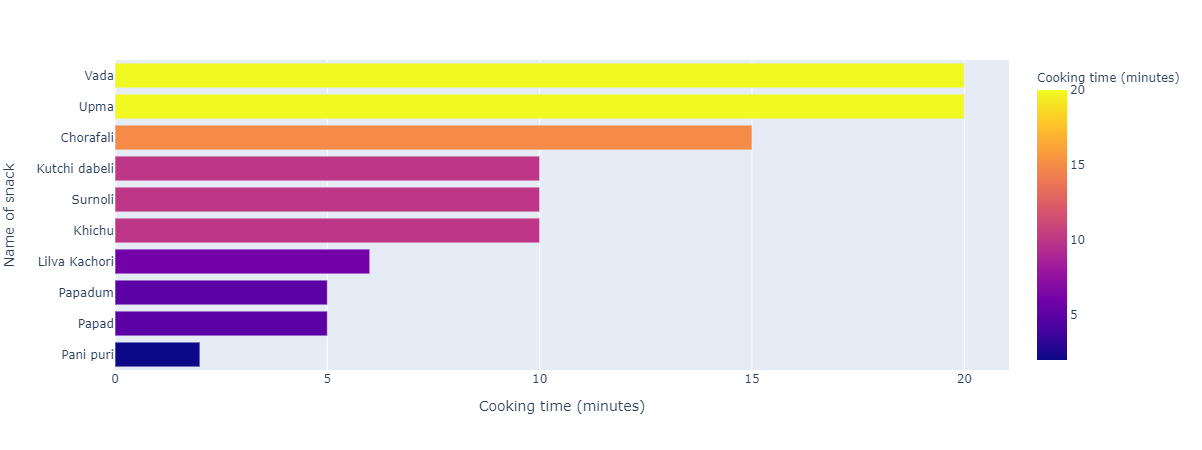

In [13]:
snack_df = df[df['course']=='snack']

short_sort_snack_df = snack_df.sort_values(['cook_time'],ascending=True).iloc[:10,:]

fig = px.bar(short_sort_snack_df,y='name',x='cook_time',
             orientation='h',color='cook_time',
            labels={'name':'Name of snack','cook_time':'Cooking time (minutes)'})
fig.show()

### Top 10 snacks with longest cooking time <a class="anchor" id="section_1_2_13"></a>

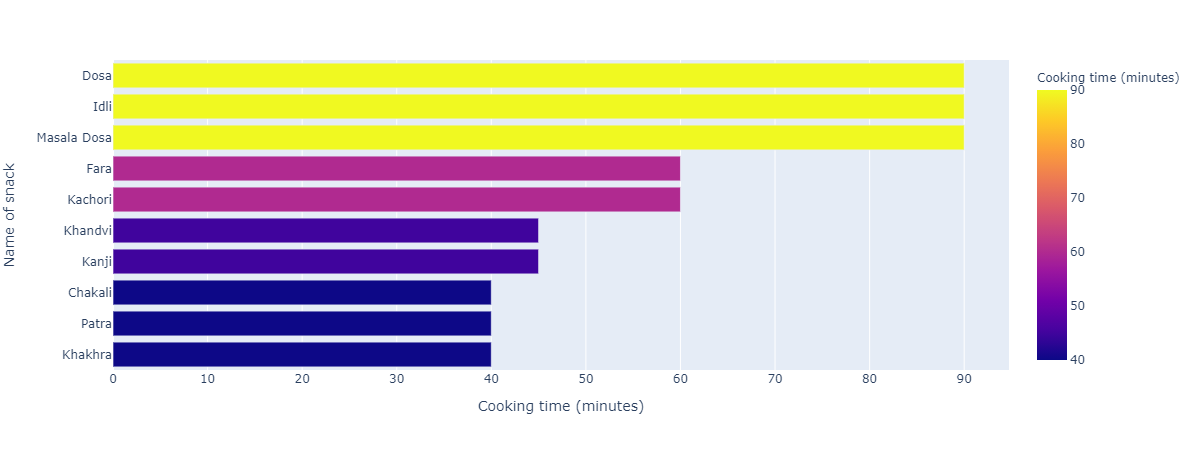

In [14]:
long_sort_snack_df = snack_df.sort_values(['cook_time'],ascending=True).iloc[26:36,:]

fig = px.bar(long_sort_snack_df,y='name',x='cook_time',
             orientation='h',color='cook_time',
            labels={'name':'Name of snack','cook_time':'Cooking time (minutes)'})
fig.show()

### Top 10 main courses with shortest cooking time <a class="anchor" id="section_1_2_14"></a>

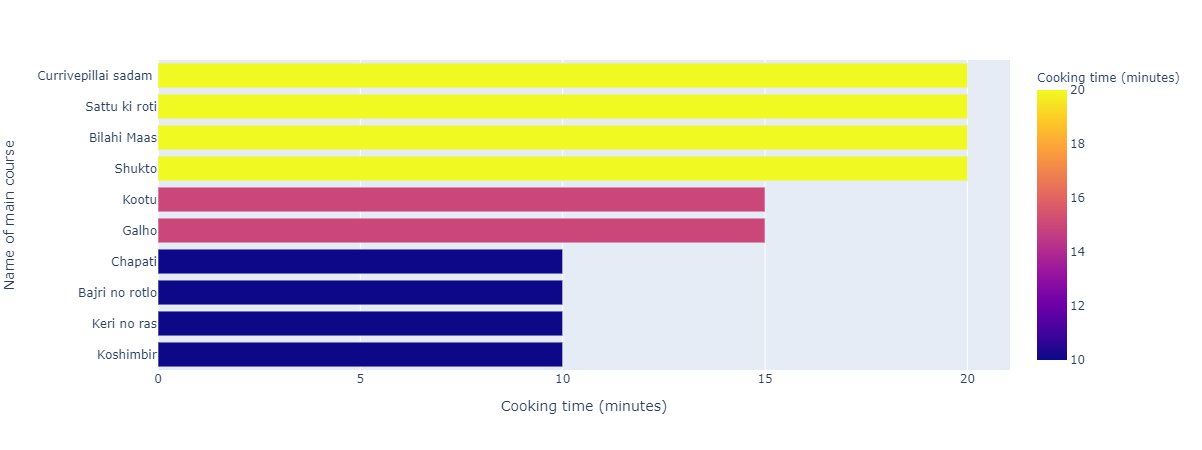

In [15]:
mc_df = df[df['course']=='main course']

small_mc_df = mc_df.sort_values(['cook_time'],ascending=True).iloc[:10,:]
fig = px.bar(small_mc_df,y='name',x='cook_time',
             orientation='h',color='cook_time',
            labels={'name':'Name of main course','cook_time':'Cooking time (minutes)'})
fig.show()

### Top 10 main courses with longest cooking time <a class="anchor" id="section_1_2_15"></a>

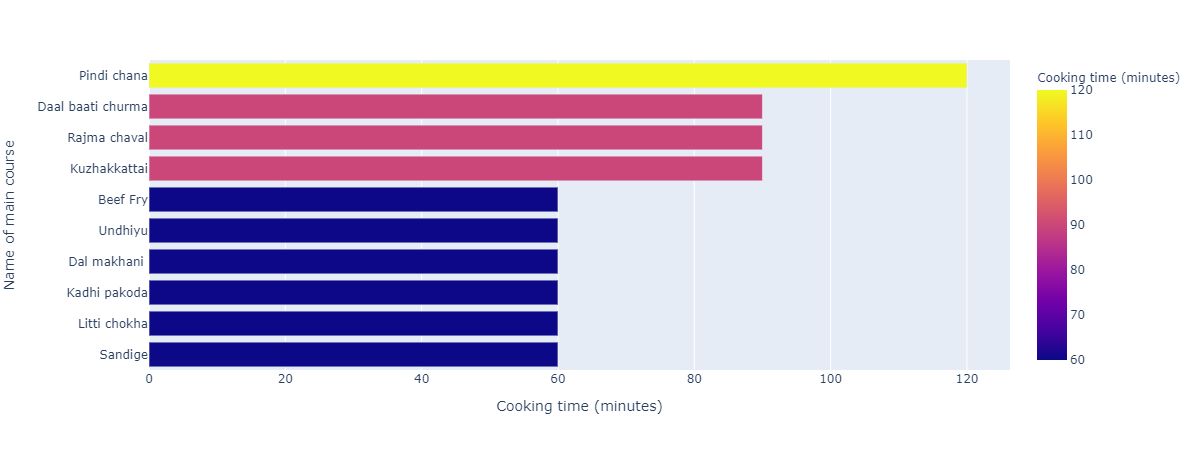

In [16]:
long_mc_df = mc_df.sort_values(['cook_time'],ascending=True).iloc[-30:-20,:]

fig = px.bar(long_mc_df,y='name',x='cook_time',
             orientation='h',color='cook_time',
            labels={'name':'Name of main course','cook_time':'Cooking time (minutes)'})
fig.show()

### Summary

This investigation into Indian Cuisine has helped us make interesting observations about our diverse cuisine.

* We predominantly a vegeterian diet.
* The most amount of dishes come from West. Followed by South and North. Central region have only 3 dishes (Probably because of data acquisition error).
* Most of our recipes account for **main course** dishes. **Desserts** are the next big thing. We have very imited **starter** dishes.
* More than 58% of the dishes are spicy in flavor. Least number of dishes are sour in flavor
* Most of the dishes vegeterian as well as non-vegeterian have preparation time and cooking time between 0 to 100 minutes.
* We also saw the infograph on **Maharashtra**, **Punjab** and **South India** dishes.
* **Pani Puri** is the snack that can be made the fastest.
* **Pindi Chana** is the main course that takes the longest time.


On further reflection, this dataset is not a true reflection of the Indian cuisine as there are mislabelled dishes and under-represented states.

But overall this gives an interesting glimpse into our country's cuisine.
